# PART 3: PREDICTIVE MODELING

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Read file

In [2]:
df = pd.read_json('/Users/laurendellon/Documents/Springboard/Projects_Docs/ultimate_data_challenge.json')
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


## Dealing with missing values

In [4]:
# Fill in missing 'phone' with Other
df['phone'] = df['phone'].fillna('Other')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   50000 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [5]:
# Fill missing 'avg_rating_of_driver' and 'avg_rating_by_driver' with mean.
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   50000 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    50000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


## Convert dates to datetimes

In [6]:
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


## Calculate 'active' users

In [7]:
# Assume that the max date is the current date. Active users are users having any activity in the preceding 30 days from the current date.
# Add a column for 'active'
df['active'] = df['last_trip_date'].apply(lambda date: 0 if (df['last_trip_date'].max() - date).days > 30 else 1)

In [8]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [9]:
((df['active'].value_counts())/df['active'].count())*100

0    62.392
1    37.608
Name: active, dtype: float64

37.61% of users were retained.

## EDA

I will investigate how several variables relate to the target variable, 'active'.

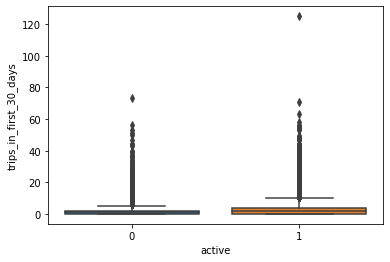

In [14]:
sns.boxplot(x='active',y='trips_in_first_30_days',data=df)

The active users have more spread when it comes to trips in first 30 days.

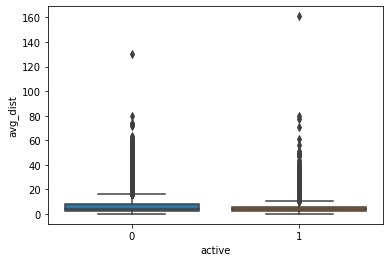

In [15]:
sns.boxplot(x='active',y='avg_dist',data=df)

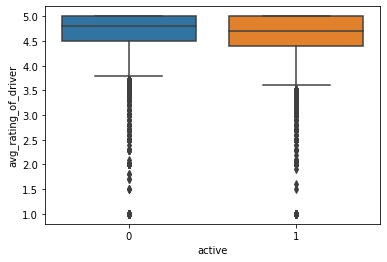

In [17]:
sns.boxplot(x='active',y='avg_rating_of_driver',data=df)

The active riders have a lower median average rating of driver.

## Preprocessing

In [19]:
# Encode ultimate_black_user as 0's and 1's
df['ultimate_black_user'] = df['ultimate_black_user'].astype(int)

In [21]:
# One hot encode city and phone
df = pd.get_dummies(df, columns=['city','phone'])
df.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_Other,phone_iPhone
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,1,46.2,3.67,5.0,1,0,1,0,0,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,0,50.0,8.26,5.0,0,1,0,0,1,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,0,100.0,0.77,5.0,0,1,0,0,0,0,1
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,1,80.0,2.36,4.9,1,0,1,0,0,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,0,82.4,3.13,4.9,0,0,0,1,1,0,0


In [22]:
# Drop irrelevant columns
df = df.drop(columns=['signup_date','last_trip_date'])

In [23]:
# Set X and y
X = df.drop(columns=['active'])
y = df['active']

Normally, standardization of the data would be required. However, I am going to use the Random Forest model which does not require standardization. Another advantage of Random Forest is that it is easy to get the feature importances from the model.

In [26]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Random Forest modeling

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100,criterion='entropy')
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [31]:
y_pred_rf = rf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_rf)
print(conf_matrix)

accuracy_rf = rf.score(X_test, y_test)
print(accuracy_rf)

[[7522 1857]
 [1907 3714]]
0.7490666666666667


In [32]:
cv_scores_test = cross_val_score(rf,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train = cross_val_score(rf,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_rf_test = cv_scores_test.mean()
cv_scores_rf_train = cv_scores_train.mean()
cv_scores_std_test_rf = cv_scores_test.std()
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))
print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_rf))

[0.80705138 0.82196375 0.81038037 0.81141801 0.81623443]
Mean cross validation train score: 0.8247373187199551
Mean cross validation test score: 0.8134095888518094
Standard deviation in cv test scores: 0.005190815535248527


## Feature Importances from Random Forest model

Text(0, 0.5, 'Feature Importance Score')

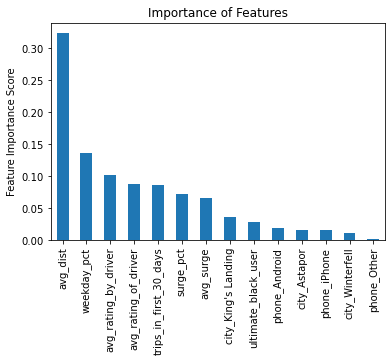

In [33]:
predictors = list(X_train)
feat_imp = pd.Series(rf.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar',title='Importance of Features')
plt.ylabel('Feature Importance Score')

Using a Random Forest model, I achieved a cross-validation testing score of 81.34%. This will be useful for determining whether a user will be retained in the future. 

The most important feature by far is the average distance taken in the first 30 days after signup. The second and third most important features are the percent of the user's trips occurring during a weekday and the rider's average rating over all of their trips. 

To improve rider retention, Ultimate could incentivize riders to take longer trips or take more trips during the weekdays.